In [1]:
import ipyfan
from ipyfan.utils import norm_fn, rgba2rgb
import numpy as np
import ipywidgets as widgets
import glob
import os
import matplotlib.pyplot as plt
from ipyfan.iis_model import ritm_model as iis_model  # AI

modifying input layer


In [2]:
list_imgs = glob.glob('figs/*')
out_folder = 'out/'
labels_folder = 'labels/'
print(list_imgs)
img_ind = 3

curr_im = (255*norm_fn(plt.imread(list_imgs[img_ind]))).astype(np.uint8)
# Create an orange mask corresponding to the reference label
# curr_ref = np.stack((255*np.ones(curr_im[..., 0].shape), 100*np.ones(curr_im[..., 0].shape), 0*np.ones(curr_im[..., 0].shape), 255*np.ones(curr_im[..., 0].shape)), axis=2) * (255 * plt.imread(labels_folder + os.path.basename(list_imgs[img_ind]))).astype(np.uint8)[..., None] /255.
curr_ref=None

['figs/screen.png', 'figs/screen_small.png', 'figs/chairs.png', 'figs/obama.webp']


In [3]:
validate_button = widgets.Button(
        description='Validate',
        disabled=False)

fig = plt.figure(1)
def validate(b):
    global w, fig
    fig.add_subplot(1,1,1)
    plt.imshow(w.annI[:, :, 0], interpolation='NEAREST')
    w.reset()

validate_button.on_click(validate)


<Figure size 432x288 with 0 Axes>

In [4]:
# iis_model = None
layout_size = 400
# s = ipyfan.FullSegmenter(curr_im, curr_ref, layout_size, iis_model)
s = ipyfan.FullSegmenter(iis_model, curr_im, curr_ref)
w = s.w  # to access internal variables
widgets.VBox([s.get_widget(), validate_button])

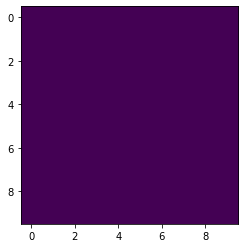

In [5]:
plt.imshow(w.propL[..., 0])